# Nearest Object Classification
Team members:
- Sullivan Crouse

## Overview and External Knowledge
This notebook contains the complete analysis of the [Nearest Earth Object Dataset](https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024?resource=download). This dataset contains information about Nearest Earth Objects (N.E.O.) which are "comets and astroids that...enter the Earth's neighborhood" ([NASA](https://cneos.jpl.nasa.gov/about/basics.html#:~:text=Near%2DEarth%20Objects%20(NEOs),to%20enter%20the%20Earth's%20neighborhood.)). NASA also classifies N.E.O.s as being "[1.3 astronomical units of the sun](https://www.jpl.nasa.gov/keeping-an-eye-on-space-rocks)". They state that a relatively small number of N.E.O.s are close enough or large enough in size to be closely monitored. The importance of this is, as stated by NASA, is "**knowing the size, shape, mass, composition and structure of these objects helps determine the best way to divert one, should it have an Earth-threatening path.**" These monitored objects are labeled as hazardous in the dataset.

A cool visualization into this from [theskylive.com](https://theskylive.com/near-earth-objects) which has a neat page containging information o fupcoming close approaches as well as a 3d visualization of where the orbits of these objects are in space. One important take away from this is that the names of the space object has a year in it, but it is not hte year of closest approach. Instead it appears to be the year it was discovered.  

## Data and Research Question
The dataset for this problem has the following features (descriptions directly from Kaggle):
- neo_id: unique id for each asteroid
- name: name given by NASA
- absolute_magnitude: describes intrinsic luminosity
- estimated_diameter_min: minimum estimated diameter in kilometres
- estimated_diameter_max: maximum estimated diameter in kilometres
- orbitining_body: planet that the asteroid orbits
- relative_velocity: velocity relative to Earth Kmph
- miss_distance: distance in Kilometres missed
- is_hazardous: Boolean feature that shows whether asteroid is harmful or not


Given that these hazardous N.E.O.s are classified and labeled by NASA, there is not much use for us to try to create a predictive model. Rather a prescriptive model would be a better usecase to help us determine what factors contribute greatly when NASA classifies an object as hazardous. The first thought that comes to mind with this is using a statistical model like Logistic Regression and evaluating the parameters of the model to help identify key components in what makes an object hazardous. We could also do some clustering on the data as well to gleem some more insights. Therefore, the research question for this project is "**what are the key features that make a N.E.O. be classified as hazardous**".



## Packages and Data

Import our packages for data wrangling and exploration

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Read in our data

In [2]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

Let's get a quick glance at our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


We can quickly guage a couple of things from this:
- a lot of our data is numeric
- we avge null values in absolute_magnitude, estimated_diameter_min and estimated_diameter_max
- we have an id column which we might not need/want

In [4]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


Other noteable finds from the quick overview are:
- name appears to contain a year in it, which we might be able to extract it
- it looks like we only have the orbiting body of earth, but we should verify it

Let's quickly check the value counts of the orbiting_body and is_hazardous (our target var)

In [5]:
for var in ['orbiting_body','is_hazardous']:
    print(f'Frequencies for {var}:\n{df[var].value_counts(normalize=True)}')

Frequencies for orbiting_body:
orbiting_body
Earth    1.0
Name: proportion, dtype: float64
Frequencies for is_hazardous:
is_hazardous
False    0.872377
True     0.127623
Name: proportion, dtype: float64


We can see from this that Earth is our only value for orbiting_body. We also see that our target variable is pretty unbalanced, so we might need to go through and balance our dataset before modeling. Lastly let's get a quick understanding of the aggregate statistics of our numeric features.

In [6]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


Notably from this we see that we have some outliers in our data, we'll need to remove these from our dataset. We'll first make a helper function for this.

In [7]:
def is_not_outlier(feature: pd.Series) -> pd.Series:
    """
    Function for identifying non outliers within a pandas series

    Parameters
    ----------
    feature : pandas series object

    Returns
    -------
    Boolean series for values that are not outliers

    """
    
    # get lower quartile
    lower = feature.quantile(.25)
    
    # get upper quartile
    upper = feature.quantile(.75)
    
    # get our iqr
    iqr = upper - lower
    
    # create our boolean array
    is_outlier = (feature<(lower-1.5*iqr))|(feature>(upper+1.5*iqr))
    
    return is_outlier

Nopw let's check how many outliers we have over all across all features. This should help us see how many records we might lose if we removed them all. Shoutout to [stackoverflow](https://stackoverflow.com/questions/20528328/numpy-logical-or-for-more-than-two-arguments) for helping me easily find out how to do this logical_or.

In [8]:
columns = []
for column in df.drop(columns='neo_id').describe().columns:
    columns.append(is_not_outlier(df[column]))

outliers = np.logical_or.reduce(columns)
pd.Series(outliers).value_counts()

False    308245
True      29954
Name: count, dtype: int64

It looks like these outliers represent around 10% of our data, which is around the amount of hazardous objects we have. Let's veriffy they are not correlated, if they are we shouldn't drop them. We'll use a chisquare association test (used this [article](https://www.stratascratch.com/blog/chi-square-test-in-python-a-technical-guide/) as reference).

In [9]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['is_hazardous'],outliers))
print(f"At an alpha level of .05 we {'reject' if p <.05 else 'fail to reject'}"
      f" the null hypothesis that outliers and hazardous objects are independent."
      f"\np = {p:.3f}")

At an alpha level of .05 we reject the null hypothesis that outliers and hazardous objects are independent.
p = 0.000


Unfortunately it looks like our outliers are not independent, so we cannot remove them. Next let's move onto feature extraction.

Let's now extract the year from our name feature. Luckily it looks like it appears to be after the opening parenthesis.

In [10]:
df['discovered_year'] = df['name'].apply(lambda x: x.split('(')[1][:4])

Let's check the unique values of our new feature.

In [11]:
df['discovered_year'].unique()

array(['1998', '2008', '2003', '2002', '2011', '2014', '2010', '2018',
       '2019', '2022', '2024', '2000', '2021', '2006', '2004', '2013',
       '1993', '2005', '2007', '2001', '2015', '2017', '1999', '2009',
       '2012', '2016', '2020', '2023', '1991', '1986', '1994', '1975',
       'A918', '1987', '1996', '1995', '1992', '1989', '1977', '1997',
       '1950', '1971', '1990', '1978', '1982', '1988', '1949', 'A911',
       'A924', '1976', '1983', '1948', '1984', '1981', '6743', '1972',
       '1936', '1973', '1980', '1932', '1937', '1974', '1951', '1947',
       'A898', '4788', '1979', '1959', '6344', '1985', '5025', '1960',
       '1968', '1929', '1953', '1963'], dtype=object)

Unfortunately this does not appear to have worked. Perhaps we were a little too brazen with our assumptions. Let's look at the records that have broken our assumption.

In [12]:
unfriendly = df[df['discovered_year'].isin(['A918','A924','6743','A898','4788','6344','5025','A911'])]
unfriendly.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,discovered_year
338,2000887,887 Alinda (A918 AA),13.88,4.451998,9.954971,Earth,24497.250026,4.795258e+07,False,A918
3876,2000719,719 Albert (A911 TB),15.59,2.025606,4.529393,Earth,25865.435669,3.073963e+07,False,A911
4206,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,Earth,61537.325800,5.705108e+07,False,A924
6662,2005011,5011 Ptah (6743 P-L),16.70,1.214940,2.716689,Earth,59109.944126,2.359172e+07,True,6743
9353,2000887,887 Alinda (A918 AA),13.88,4.451998,9.954971,Earth,21983.859043,3.161242e+07,False,A918


It looks like our assumptions about the name column were incorrect, not all records contain a year. Let's check to see how many this is.

In [13]:
unfriendly.shape[0]

56

A grand total of 56 records broke our assumption. In a dataset with over 300k records that's not enough records for me to be concerned with. I am drop these records under the justification that they represent such a small percent of records and I believe that the year might be useful. 

In [14]:
df = df[~(df['discovered_year'].isin(['A918','A924','6743','A898','4788','6344','5025','A911']))]
df['discovered_year'] = df['discovered_year'].astype(int)
df.shape

(338143, 10)

While looking at the outlier features in name I noticed that we had a duplicaded record for the asteroid with neo_id of 2000887. Despite this, the relative velocity and miss distance were not the same. This indicates that we might classify an asteroid as hazardous at first, but then our observation changes and we reclassify it. I'm not sure that this is a real concern, but it is at least worth noting. Let's take another look into the name column now to see if we can extract any other useful information from it.

In [15]:
df['name'].unique()[:50]

array(['162117 (1998 SD15)', '349507 (2008 QY)', '455415 (2003 GA)',
       '(2002 PB)', '(2011 DW)', '(2014 BT8)', '(2008 OX1)',
       '(2010 OF101)', '(2018 YH)', '(2019 UP13)', '(2022 CM3)',
       '627157 (2008 OX1)', '(2024 AF)', '162635 (2000 SS164)',
       '(2011 EE41)', '(2021 RA4)', '(2022 CQ2)', '277810 (2006 FV35)',
       '284422 (2006 YD)', '357439 (2004 BL86)', '(2013 LC1)',
       '(2021 CZ2)', '52387 Huitzilopochtli (1993 OM7)', '(2005 FC)',
       '(2007 AM)', '(2007 NL1)', '408980 (2002 RB126)', '(2001 SY169)',
       '(2008 CG)', '(2013 ET)', '(2015 TY237)', '(2017 BL31)',
       '(2019 AP8)', '(2019 KW)', '(2006 BX139)', '(2010 RH178)',
       '(2014 DR)', '(2021 UL)', '(2022 HH3)', '152828 (1999 VT25)',
       '494975 (2009 WO106)', '(2002 RS129)', '(2021 AP1)', '(2024 BC3)',
       '381564 (2008 UW5)', '483432 (2001 DF47)', '(2003 DZ15)',
       '(2012 AC11)', '(2013 CW87)', '(2018 PM9)'], dtype=object)

Lookign at this I cannot discern another other potentially useful information from this. I feel safe to remove this feature. Let's now remove the features that we don't need:
- neo_id since it is a unique id tied to a specific asteroid
- orbiting body since this is only earth
- name since we have already extracted information from it

In [16]:
df.drop(columns=['neo_id','orbiting_body','name'],inplace=True)

## Exploratory Analysis
This section consists of the exploratory analysis done for this project. First we'll quickly go through and look at the distribution of our features. We'll first just look at the feature distributions without comparing the distribution based on our target feature. Also we'll be using the [Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) rule to select our number of bins for the histogram.

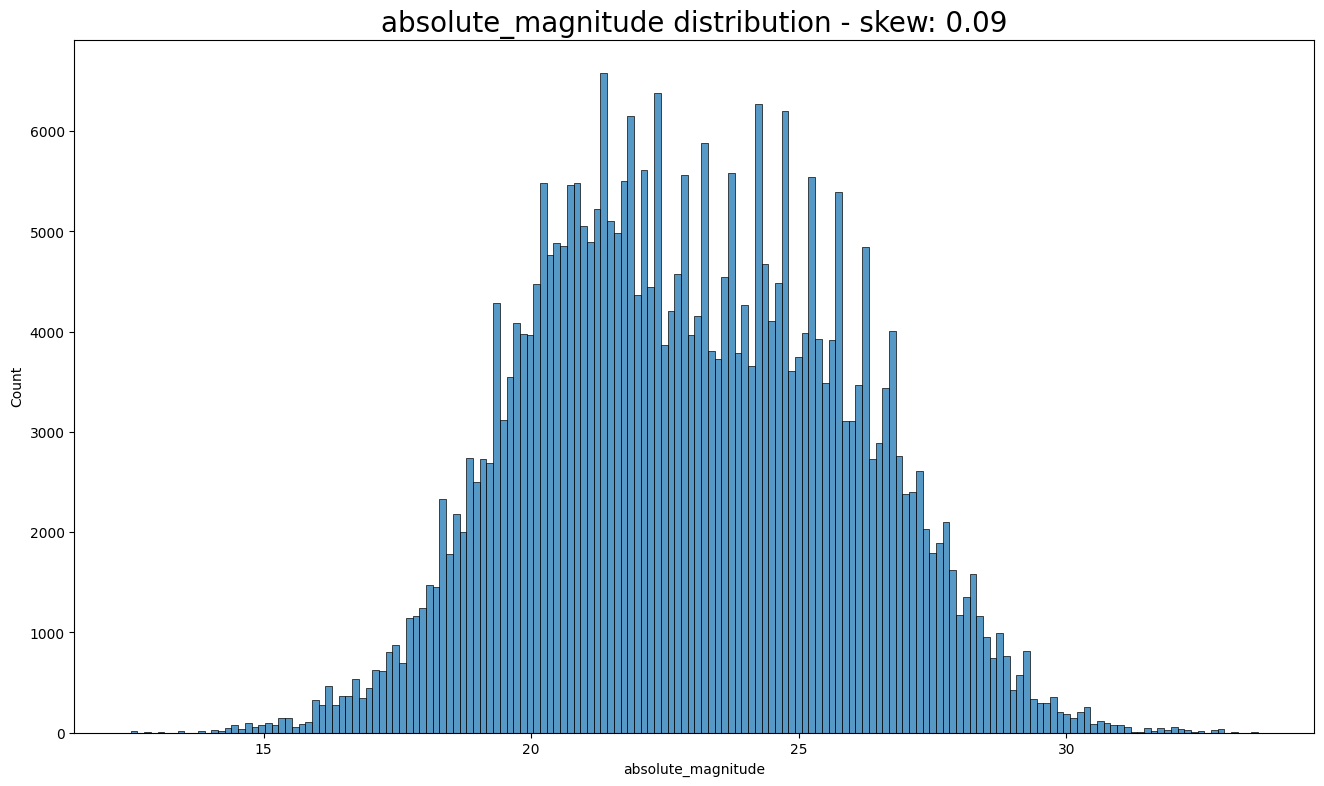

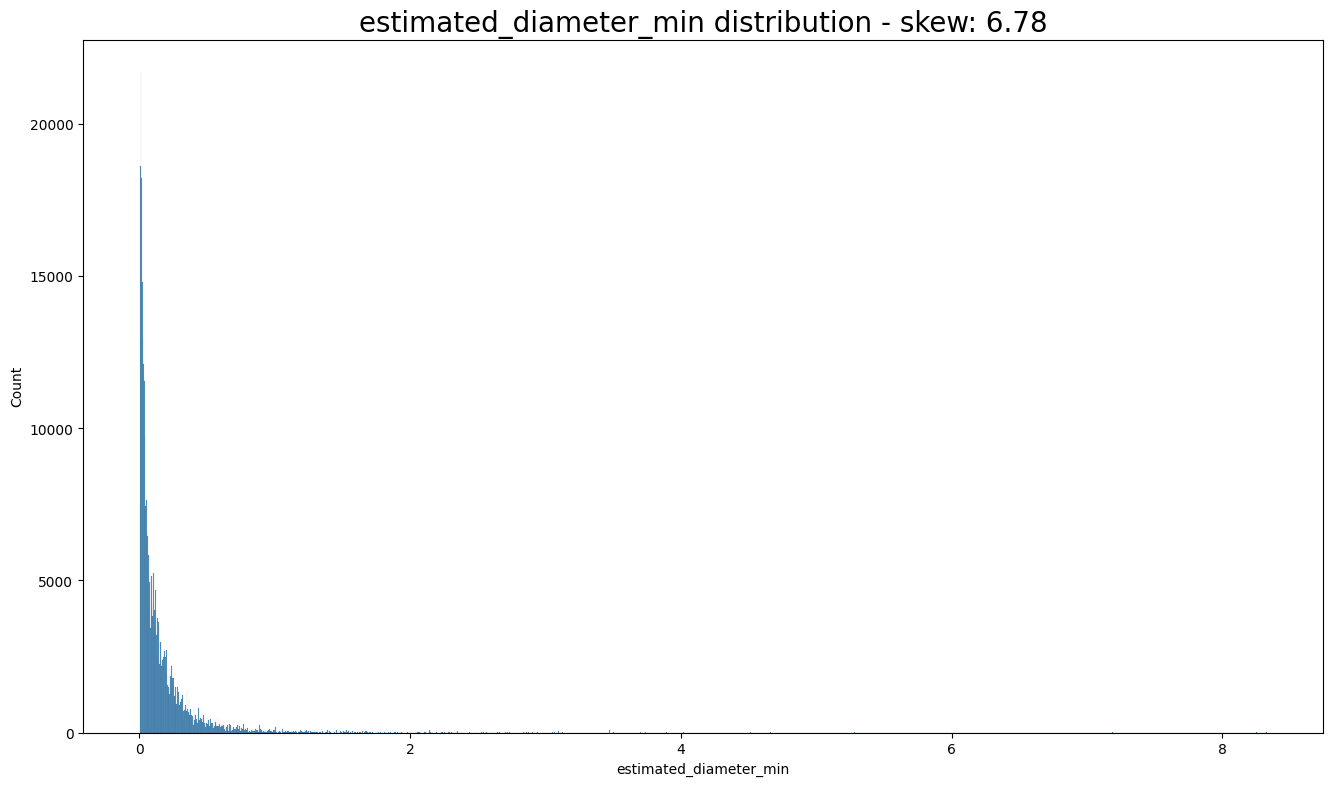

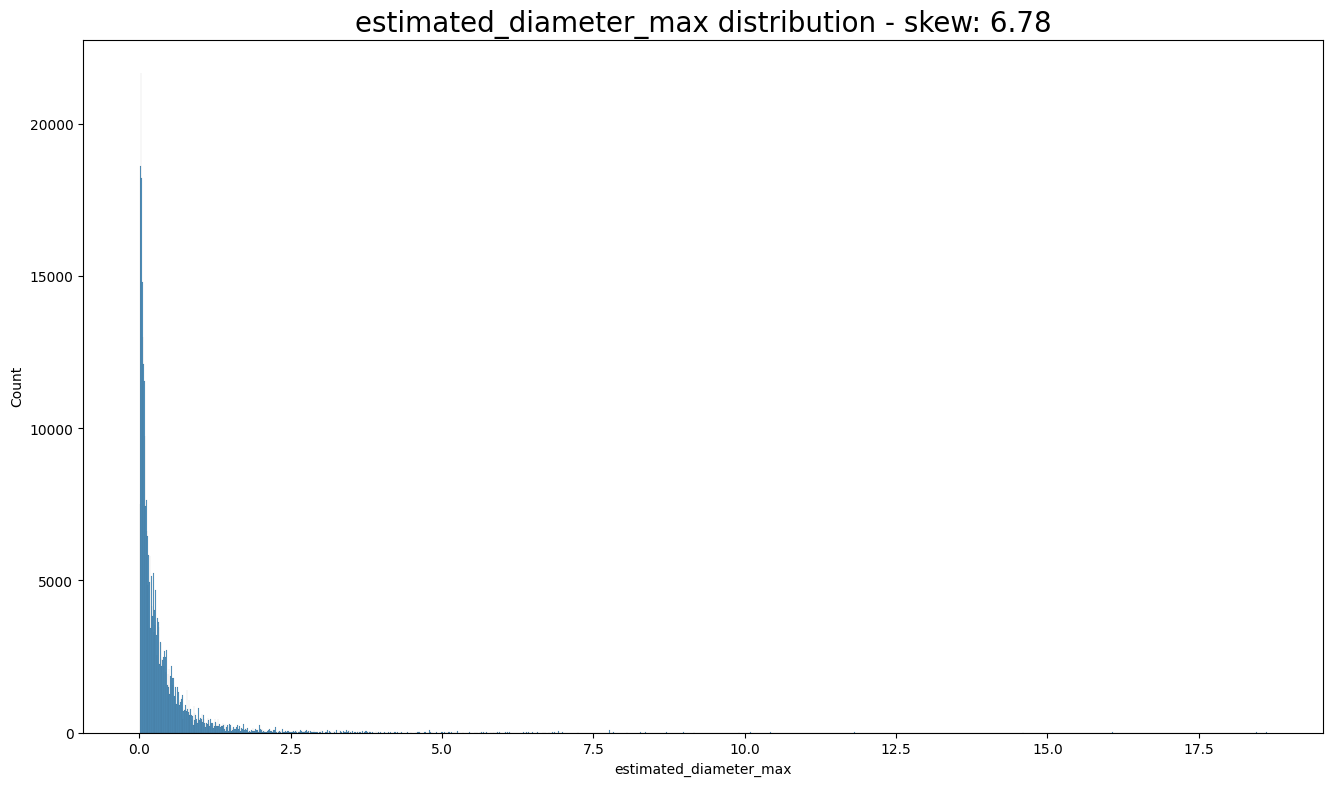

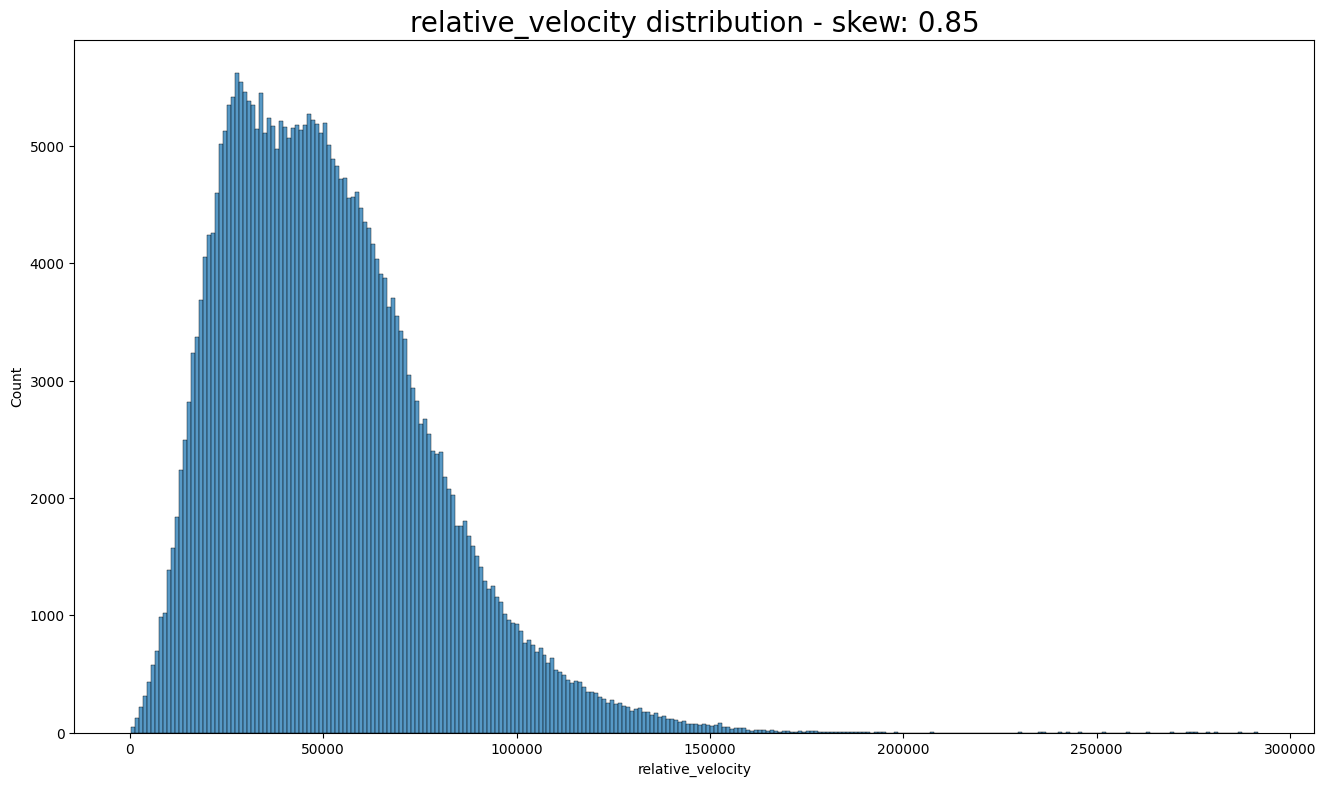

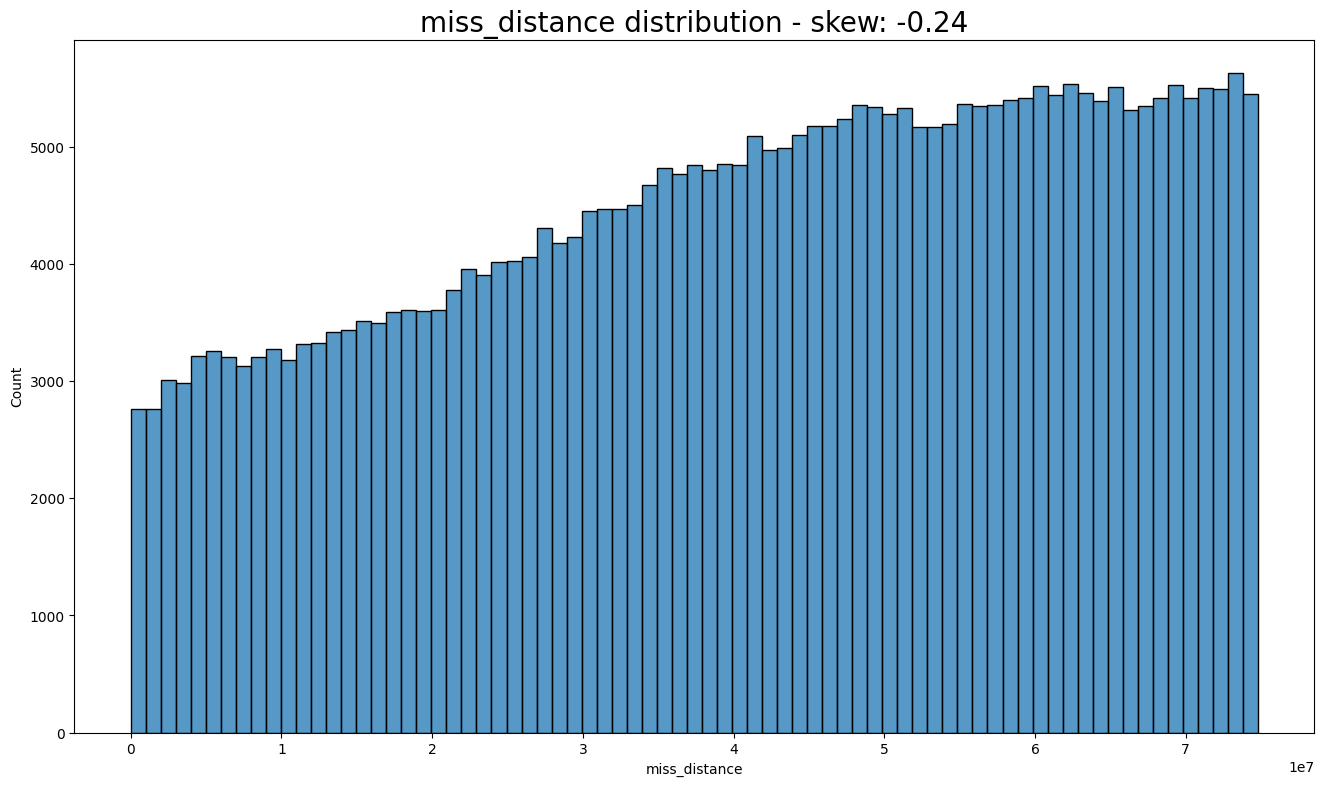

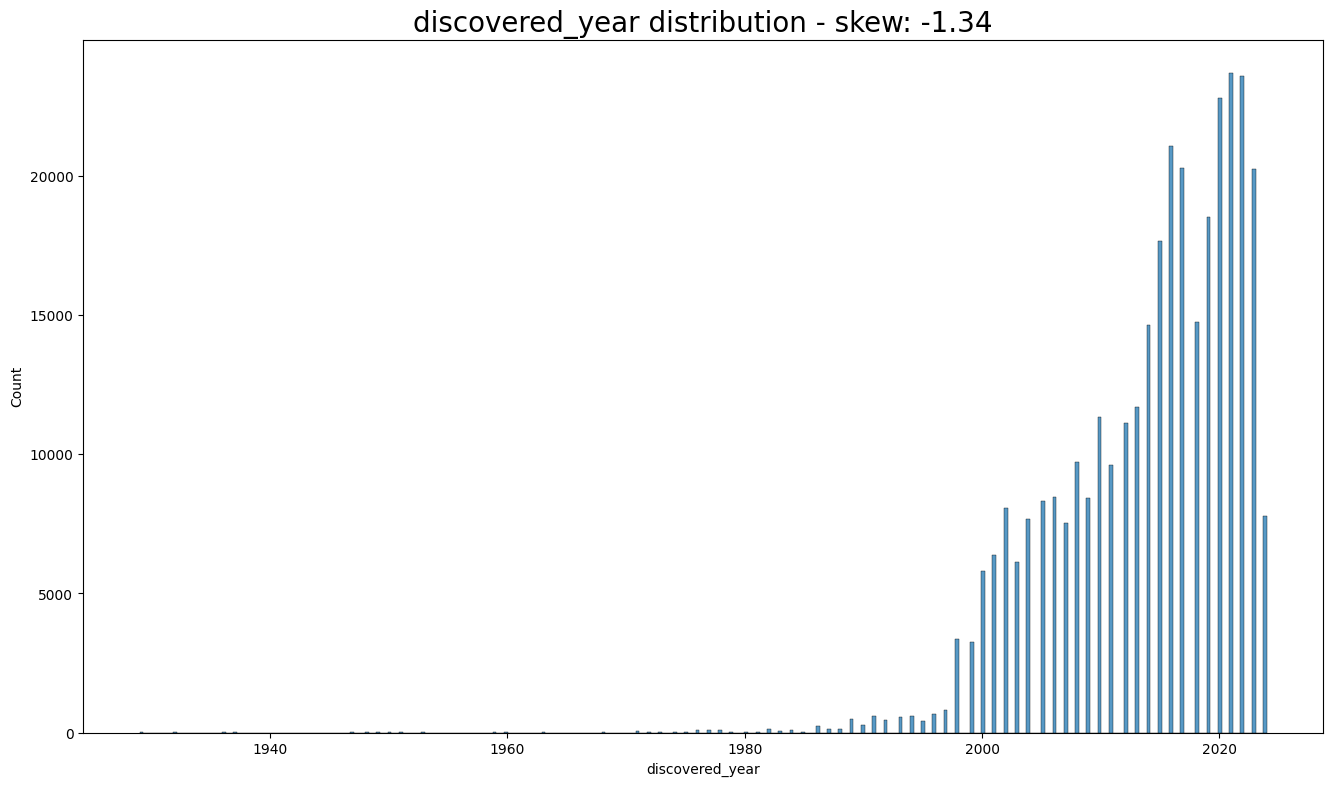

In [17]:
for var in df.drop(columns='is_hazardous').columns:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} distribution - skew: {round(df[var].skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = df[var].quantile(.75) - df[var].quantile(.25)
    bin_width = 2 * iqr/(df[var].shape[0]**(1/3)) 
    n_bins = int((df[var].max()-df[var].min())/bin_width)

    sns.histplot(data=df,x=var,bins=n_bins)
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

We can definetly tell that we need to do some normalization and standardization for our data. Particularly we'll need to deal with the incredibly right skew of the estimated diameters and the right skew of the relative velocity. Before we tackle that, let's first see what the frequencies look like for the different classes. I'm not quite sure how we can tackle the problem the years. I'm honestly thinking that the best answer might be to just bin the variable instead of doing a continuous standardization.

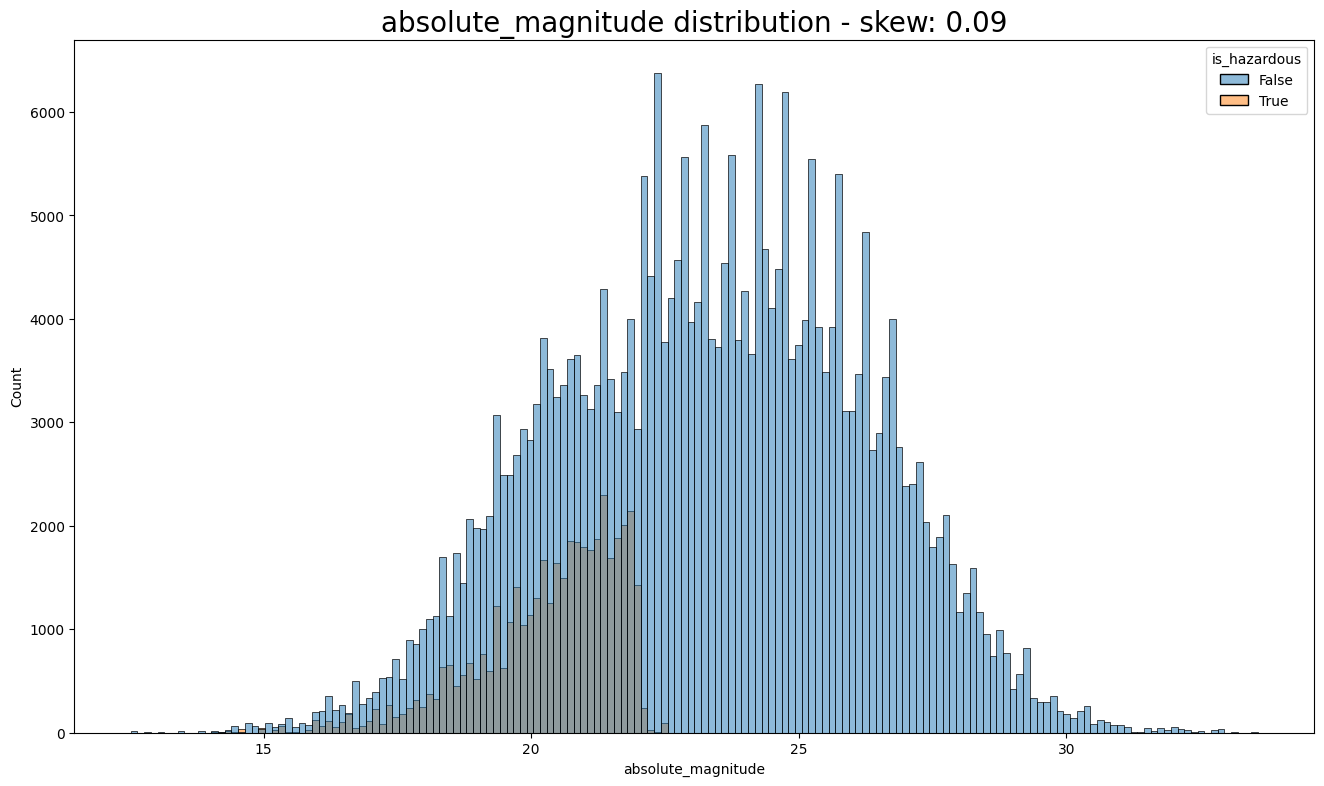

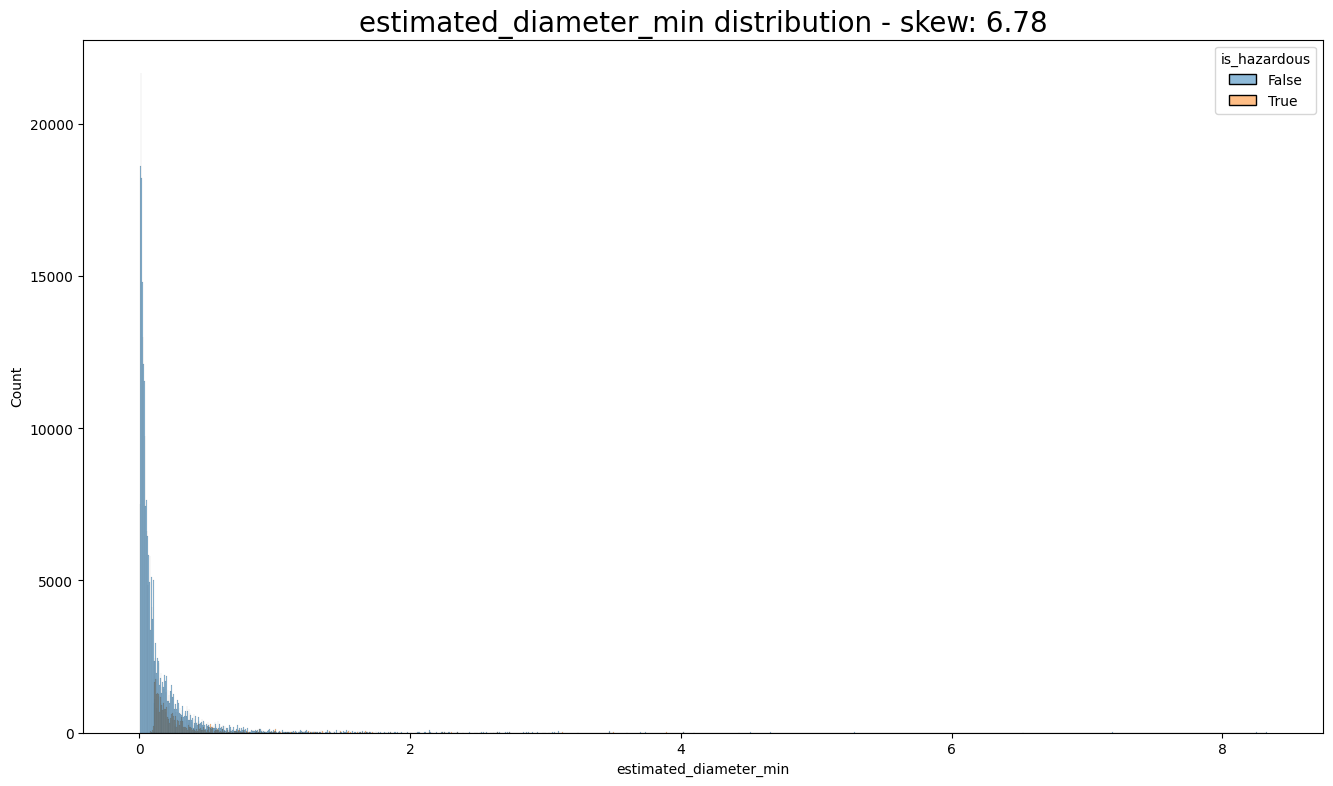

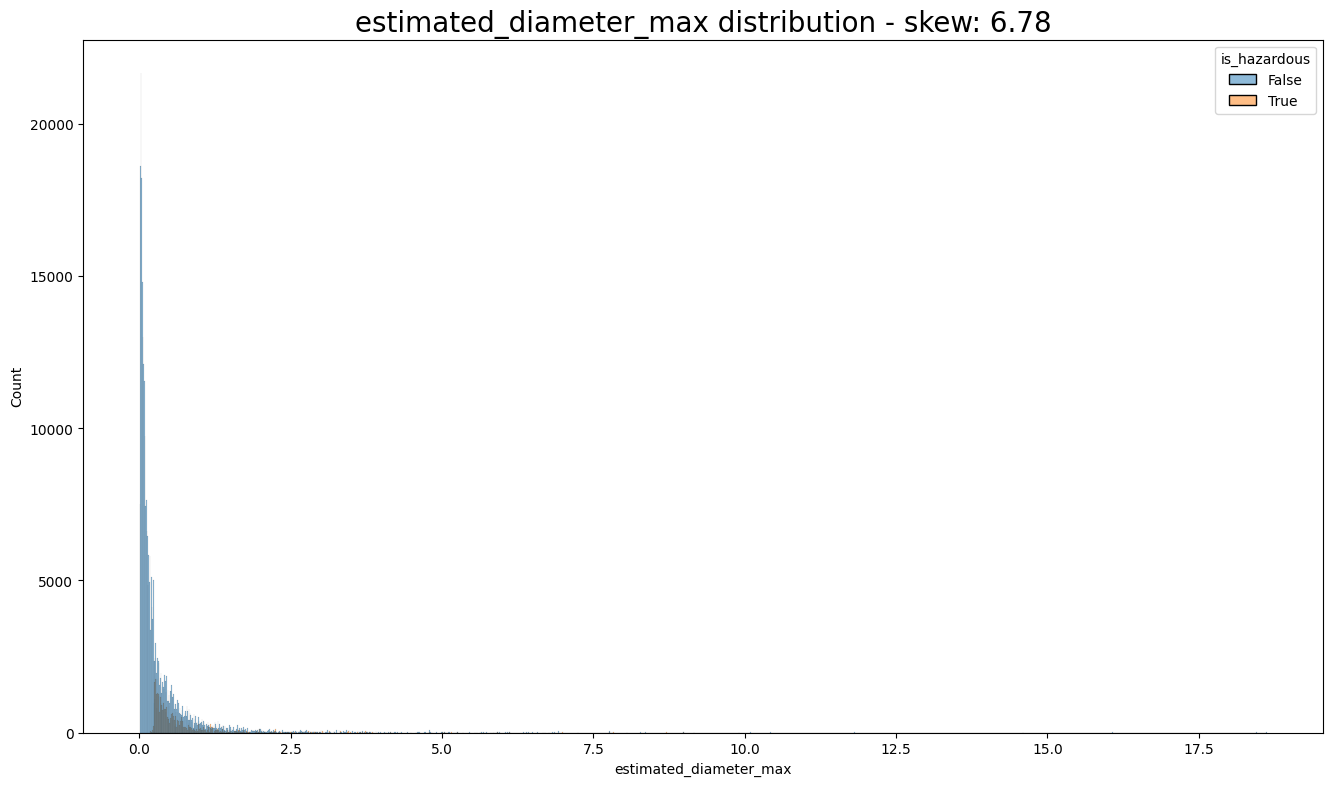

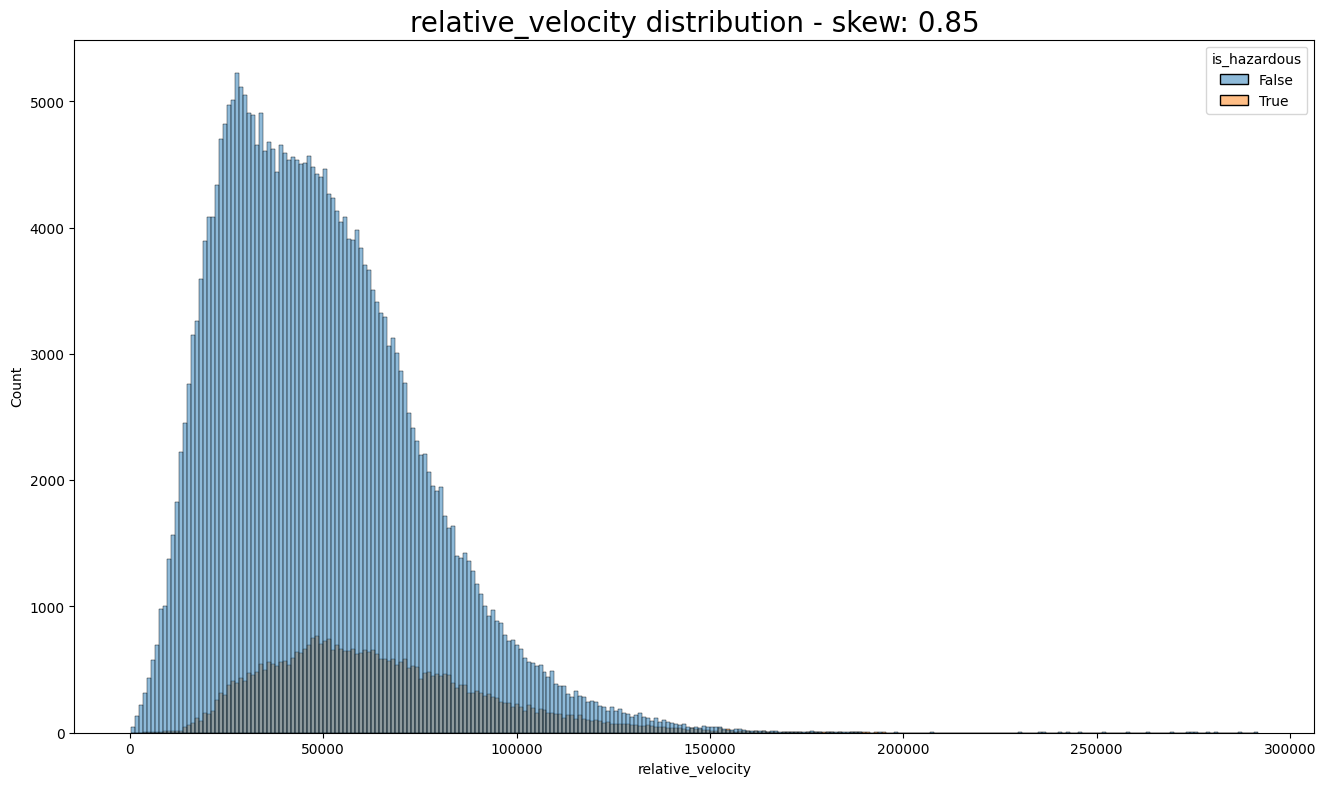

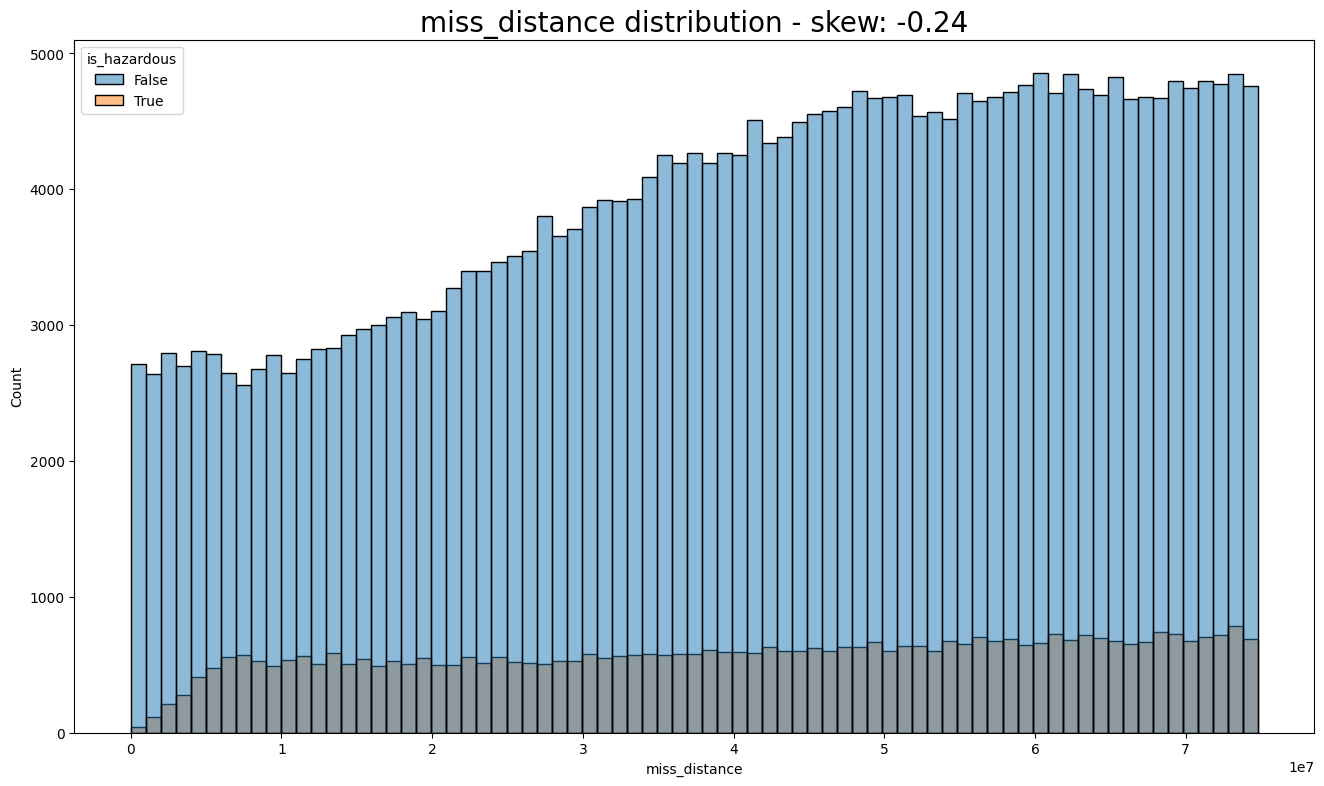

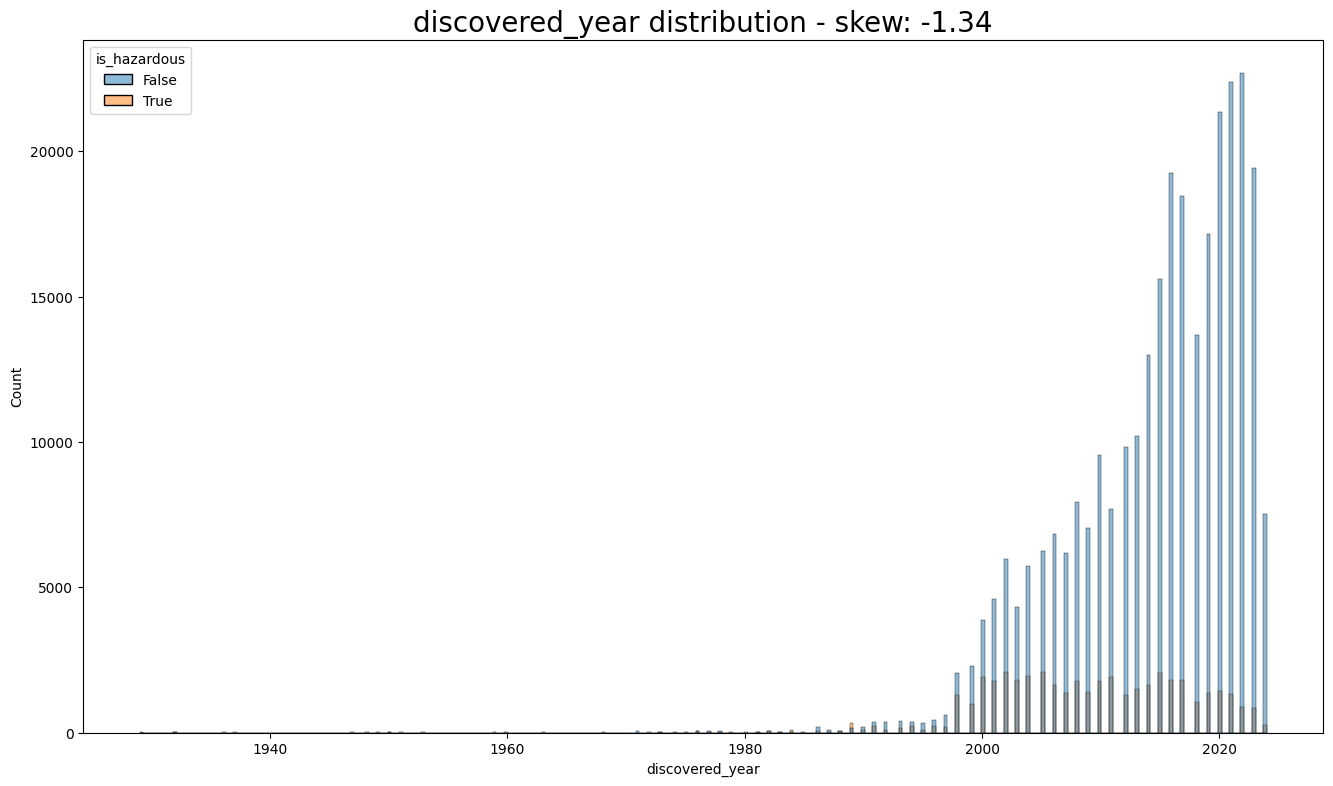

In [18]:
for var in df.drop(columns='is_hazardous').columns:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} distribution - skew: {round(df[var].skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = df[var].quantile(.75) - df[var].quantile(.25)
    bin_width = 2 * iqr/(df[var].shape[0]**(1/3)) 
    n_bins = int((df[var].max()-df[var].min())/bin_width)
    
    sns.histplot(data=df,x=var,bins=n_bins,hue='is_hazardous')
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

So some important insights from this are:
- hazardous objects appear to have lower luminousity
- hazardous objects appear to have a higher average relative velocity

Let's now go through and normalize our data. For estimated diameter we'll probably need something stronger than a square root, so we'll take the natural log of these vars.

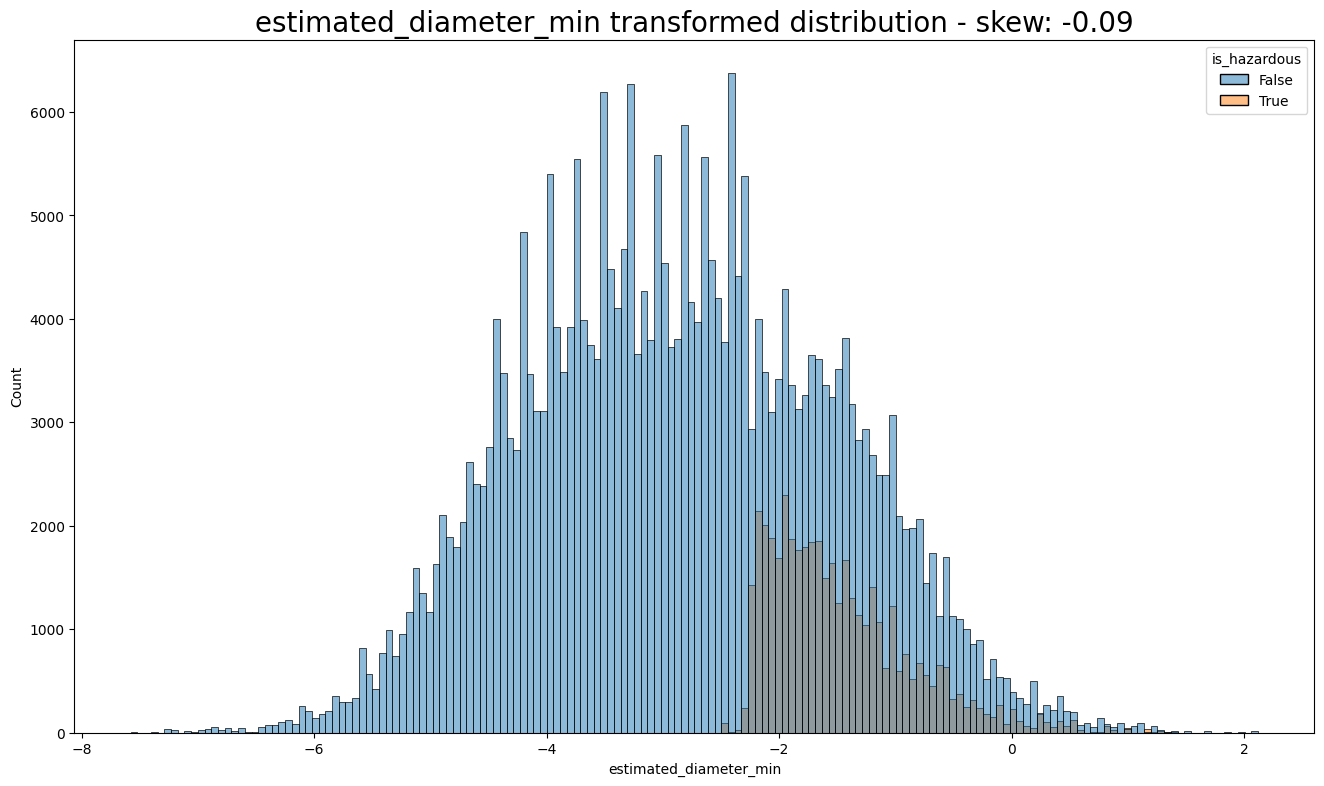

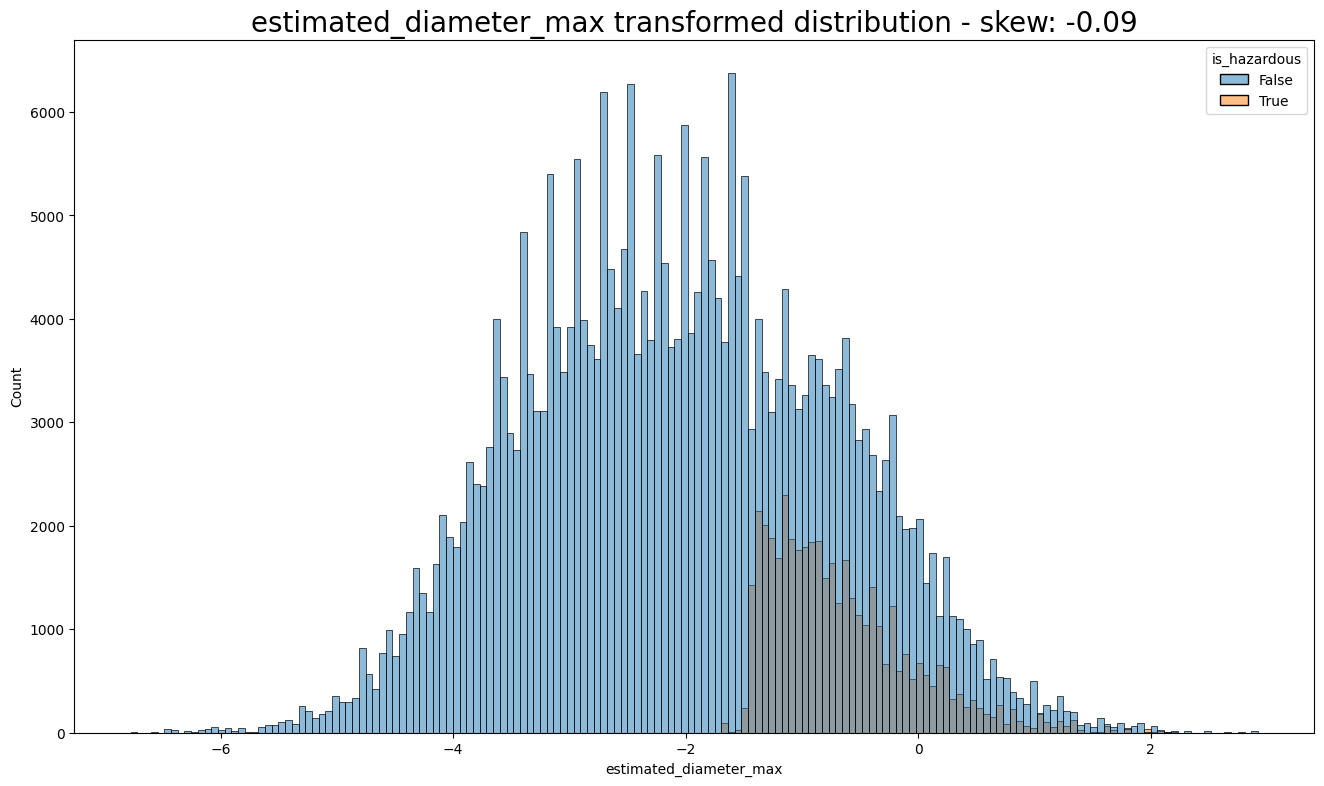

In [19]:
for var in ['estimated_diameter_min','estimated_diameter_max']:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} transformed distribution - skew: {round(np.log(df[var]).skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = np.log(df[var]).quantile(.75) - np.log(df[var]).quantile(.25)
    bin_width = 2 * iqr/(np.log(df[var]).shape[0]**(1/3)) 
    n_bins = int((np.log(df[var]).max()-np.log(df[var]).min())/bin_width)
    
    sns.histplot(x=np.log(df[var]),bins=n_bins,hue=df['is_hazardous'])
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

We managed to bink the correct transformation on our first try. Interestingly, it looks like this plot is a mirror of the absolute luminosity variable, event reflected in it's skew. So I guess we just found the mathematical relationship for these two variables LOLL.

Let's now try the velocity by taking the square root of it.

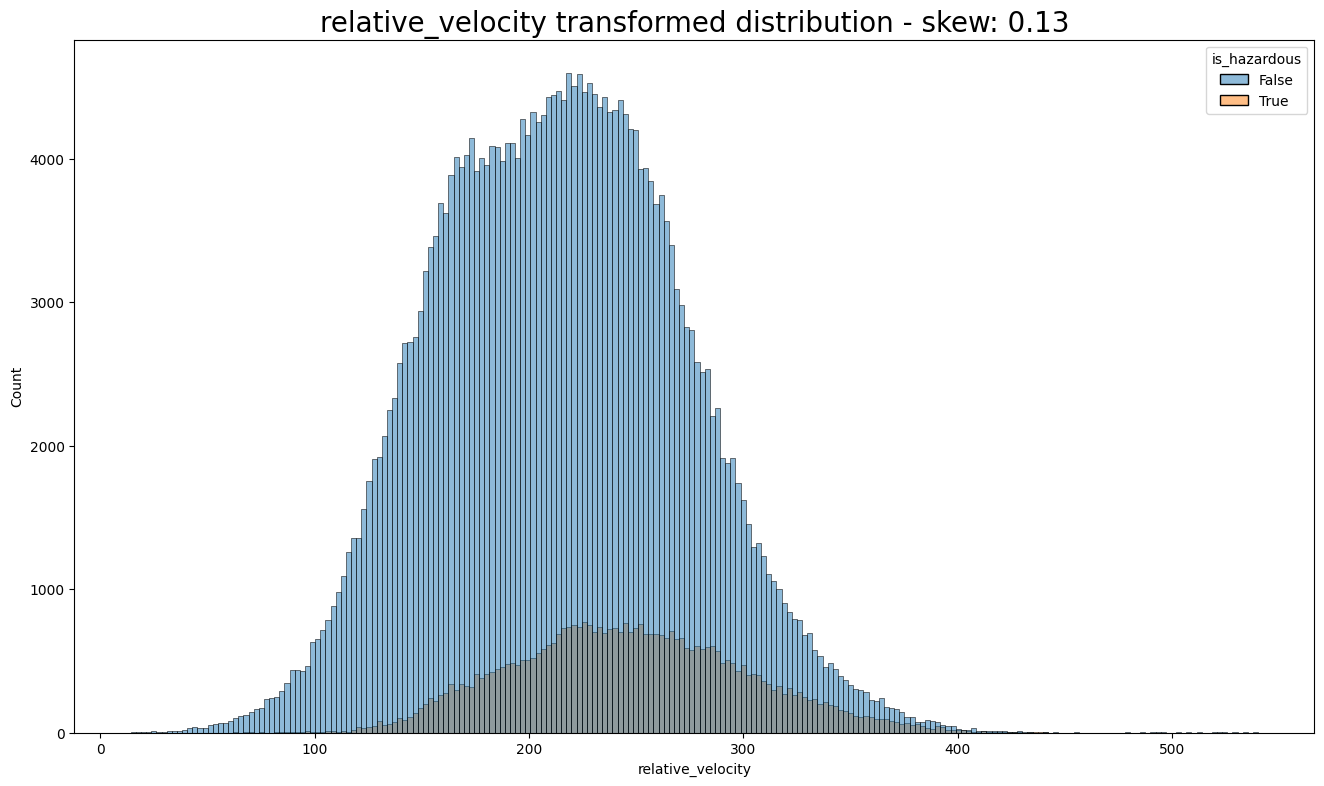

In [20]:
var = 'relative_velocity'
plt.figure(figsize=(16,9))
plt.title(f"{var} transformed distribution - skew: {round(np.sqrt(df[var]).skew(),2)}",fontsize=20)

# Next lines calc our bin width for our hist
iqr = np.sqrt(df[var]).quantile(.75) - np.sqrt(df[var]).quantile(.25)
bin_width = 2 * iqr/(np.sqrt(df[var]).shape[0]**(1/3)) 
n_bins = int((np.sqrt(df[var]).max()-np.sqrt(df[var]).min())/bin_width)
    
sns.histplot(x=np.sqrt(df[var]),bins=n_bins,hue=df['is_hazardous'])
plt.ylabel("Count")
plt.xlabel(var)
plt.show()

This seems to have worked really well. I think I am now happy with how we have normalized our values. Miss distance and year will be ignored for now because I do not have any ideas to tackle them at the moment for normalization. Like I said before I might just bin the discovered year. Let's now go through and apply our transformations.

In [21]:
df_transformed = df.copy()
df_transformed['estimated_diameter_min'] = np.log(df_transformed['estimated_diameter_min'])
df_transformed['estimated_diameter_max'] = np.log(df_transformed['estimated_diameter_max'])
df_transformed['relative_velocity'] = np.sqrt(df_transformed['relative_velocity'])

Let's now see how our variables are correlated with eachother. We have far too many datapoints to do scatterplot matrix. We could sample it, but honestly I don't really care that much to do so.

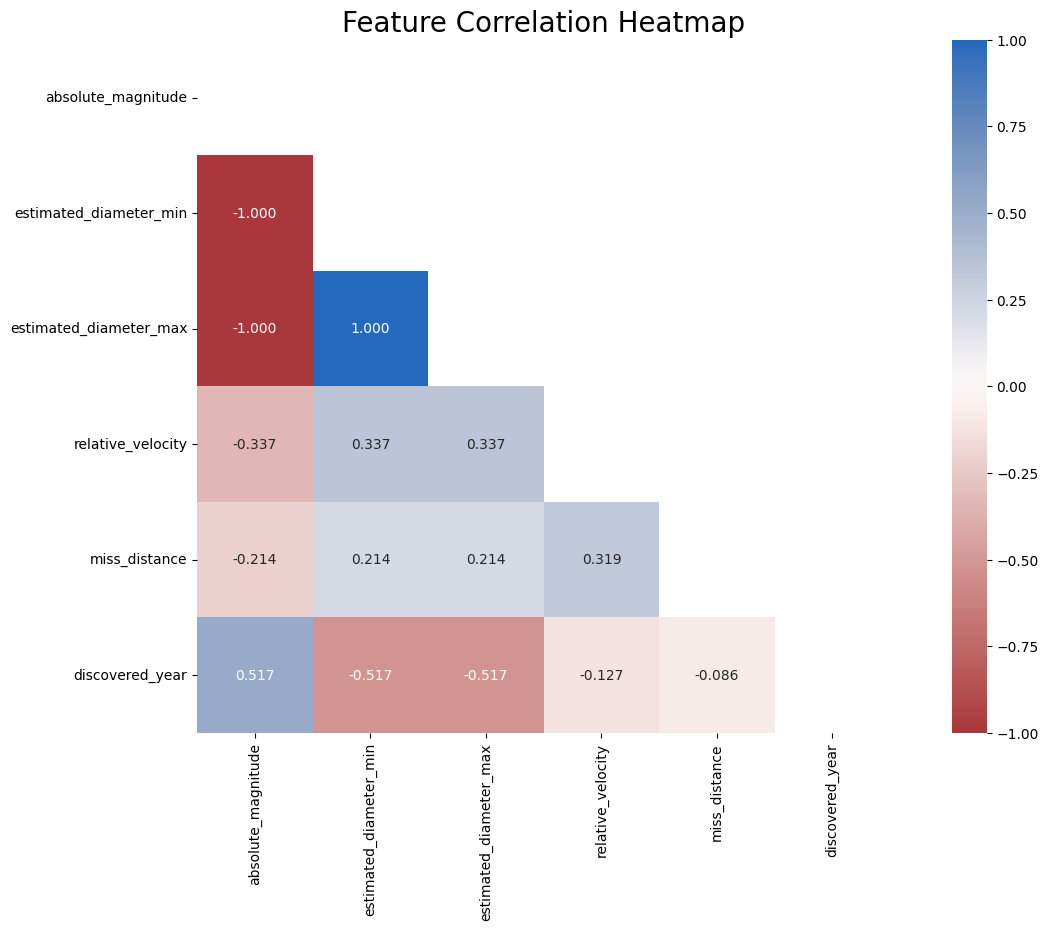

In [22]:
# Get the correlation matrix
feature_corr = df_transformed.drop(columns='is_hazardous').corr()

# mask for upper part of heatmap
trimask = np.triu(np.ones_like(feature_corr, dtype=bool))

# Make our plot
plt.figure(figsize = (16,9))
plt.title("Feature Correlation Heatmap",
         fontsize=20)
sns.heatmap(
    feature_corr,
    vmin=-1, vmax=1, center=0,
    cmap = sns.color_palette("vlag_r", as_cmap=True),
    square=True,
    annot=True,
    fmt='.3f',
    mask=trimask
)
plt.show()

So we definetly have some colinearity within our features, which matters since we're planning to use Logistic Regression which wants no colinearity in features. We should remove the colinear features. My justification is going to be we should keep absolute_magnitude since it was the untransformed feature. Everything else should be fine. Interestingly we also see that there is some positive correlation with discovered year and luminousity, which is pretty interesting, not sure why that would be the case. 

Our final features will be:
- absolute_magnitude
- relative_velocity
- miss_distance
- discovered_year

This should to be pretty interesting moving forward.